# **Case Study: Analysis of Cyclistic bike-share**

 
#  Introduction

This case study analysis was performed as part of the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) Capstone project. I chose to analyze the case study 1 scenario on Cyclistic, a bike-share program. I have used the 'ask, prepare, process, analyze, share, and act' data analysis roadmap to create this project. 

# Ask 

## Case study scenario
I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago that provides over 5,800 bicycles and 600 docking stations. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. The director of marketing believes that maximizing the number of annual members will be key to future growth. The director would like to design marketing strategies to convert casual riders of cyclists to annual members. Therefore, my data analytics team have been tasked to understand how casual riders and annual members use Cyclistic bikes differently. 

### Business tasks

1. The main business task here is to better understand how annual members and casual riders use Cyclists bikes differently.
2. Provide recommendations based on data findings to design a new marketing strategy to convert casual riders into annual members. 

### Key stakeholders
* Primary Stakeholders: Cyclistic executive team - share findings and recommendations to this team
* Secondary stakeholders: 
 1. Lily Moreno, the director of marketing and my manager - share findings and other reporting 
 2. Cyclistic marketing analytics team -  share data collection, analysis and reporting process

# Prepare
### Data Sources
*  Data location: [here](https://divvy-tripdata.s3.amazonaws.com/index.html). 
*  Licensed by:  Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement).
* Data format: 12 csv files
* Data: Bike share data between Jan 1, 2020 - Dec 31, 2020
* Data bias and credibility: The data is presumed to be reliable (the captsone guide states the datasets are appropriate and would answer business tasks), original (data sets derived from divvy-bike share program), comprehensive (information (13 variables) required for analysis present), current (yes, updated data available), cited (yes, [here](https://divvy-tripdata.s3.amazonaws.com/index.html))

# Process
I will be using R to process/ clean the data before analysis.

### Load packages:

In [49]:
library(tidyverse)  #helps wrangle data
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data
library(data.table)


### Setting up a Directory:

In [50]:
#check your working directory 
getwd() #displays your working directory
setwd("/kaggle/working")

[1] "/kaggle/working"

### Loading data:

In [51]:
#load data
q2_2020_04 <- read_csv("../input/cycle-dataset-capstone-google/202004-divvy-tripdata.csv")
q2_2020_05 <- read_csv("../input/cycle-dataset-capstone-google/202005-divvy-tripdata.csv")
q2_2020_06 <- read_csv("../input/cycle-dataset-capstone-google/202006-divvy-tripdata.csv")

q3_2020_07 <- read_csv("../input/cycle-dataset-capstone-google/202007-divvy-tripdata.csv")
q3_2020_08 <- read_csv("../input/cycle-dataset-capstone-google/202008-divvy-tripdata.csv")
q3_2020_09 <- read_csv("../input/cycle-dataset-capstone-google/202009-divvy-tripdata.csv")

q4_2020_10 <- read_csv("../input/cycle-dataset-capstone-google/202010-divvy-tripdata.csv")
q4_2020_11 <- read_csv("../input/cycle-dataset-capstone-google/202011-divvy-tripdata.csv")
q4_2020_12 <- read_csv("../input/cycle-dataset-capstone-google/202012-divvy-tripdata.csv")

q1_2020 <- read_csv("../input/cycle-dataset-capstone-google/Divvy_Trips_2020_Q1.csv") #data from Jan - March 2020


── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = 

### combining bike-share datasets (csv files) to quarter datasets here:

In [52]:
q2_2020 <- rbind(q2_2020_04, q2_2020_05, q2_2020_06)
q3_2020 <- rbind(q3_2020_07, q3_2020_08, q3_2020_09)
q4_2020 <- rbind(q4_2020_10, q4_2020_11, q4_2020_12)


In [53]:
# Compare column names each of the files
colnames(q1_2020)
colnames(q2_2020)
colnames(q3_2020)
colnames(q4_2020)

# Inspect the dataframes and look for inconguencies
str(q1_2020)
str(q2_2020)
str(q3_2020)
str(q4_2020)

#changing from char to numeric format
q4_2020 <-  mutate(q4_2020, start_station_id = as.double(start_station_id)) 
q4_2020 <-  mutate(q4_2020, end_station_id = as.double(end_station_id)) 

# Stack individual quarter's data frames into one big data frame
all_trips <- bind_rows(q1_2020, q2_2020, q3_2020, q4_2020)

# Remove lat, long, birthyear, and gender fields as this data was dropped beginning in 2020
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng))

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

spec_tbl_df [426,887 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num [1:426887] 42 42 41.9 41.9 41.9 ...
 $ s

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


### Inspecting data set and adding new columns for further data analyses

In [54]:
# Inspect the new table that has been created
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(qs_raw)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics

#further exploration of data 
unique(all_trips$rideable_type)
#there are three types of bikes - docked, electric and classic

unique(all_trips$member_casual)
#and two types of riders - casual and members 

# Add columns that list the date, month, day, and year of each ride
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

#adding separate columns with start time w/o date 
all_trips$start_time <- format(all_trips$started_at, format = "%H:%M:%S")
all_trips$start_time <- as.POSIXct(all_trips$start_time, format = "%H:%M:%S")


# Add a "ride_length" calculation to all_trips (in minutes)
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at, units = "mins")

# Convert "ride_length" from Factor to numeric so we can run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

# Inspect the structure of the columns
str(all_trips)

# Remove "bad" data
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative

#checking rows with ride lengths <=0 and then deleting those rows
nrow(subset(all_trips,ride_length <= 0))
all_trips<- all_trips %>% 
  filter(ride_length > 0)

#checking for testrides that were made by company for quality checks

nrow(subset(all_trips, start_station_name %like% "TEST"))
nrow(subset(all_trips, start_station_name %like% "test"))
nrow(subset(all_trips, start_station_name %like% "Test"))

#since there were only rows with HQ, we will be deleting them
all_trips_v2<- all_trips[!((all_trips$start_station_name %like% "TEST" | all_trips$start_station_name %like% "test")),]


#check the data frame
glimpse(all_trips_v2)

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "start_station_id"  
[7] "end_station_name"   "end_station_id"     "member_casual"

[1] 3541683

[1] 3541683       9

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>
EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,member
8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,member
789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,member
C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,member
943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,member
6D9C8A6938165C11,docked_bike,2020-01-10 12:33:05,2020-01-10 12:37:54,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,member


tibble [3,541,683 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3541683] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:3541683] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:3541683], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:3541683], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:3541683] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:3541683] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:3541683] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:3541683] 326 318 117 24 212 96 212 212 96 100 ...
 $ member_casual     : chr [1:3541683] "member" "member" "member" "member" 

   ride_id          rideable_type        started_at                 
 Length:3541683     Length:3541683     Min.   :2020-01-01 00:04:44  
 Class :character   Class :character   1st Qu.:2020-06-18 19:10:40  
 Mode  :character   Mode  :character   Median :2020-08-09 11:42:17  
                                       Mean   :2020-07-28 22:19:57  
                                       3rd Qu.:2020-09-25 10:54:24  
                                       Max.   :2020-12-31 23:59:59  
                                                                    
    ended_at                   start_station_name start_station_id 
 Min.   :2020-01-01 00:10:54   Length:3541683     Min.   :    2.0  
 1st Qu.:2020-06-18 19:41:00   Class :character   1st Qu.:   94.0  
 Median :2020-08-09 12:14:22   Mode  :character   Median :  196.0  
 Mean   :2020-07-28 22:44:47                      Mean   :  406.6  
 3rd Qu.:2020-09-25 11:18:17                      3rd Qu.:  317.0  
 Max.   :2021-01-03 08:54:11            

[1] "docked_bike"   "electric_bike" "classic_bike"

[1] "member" "casual"

[1] FALSE

[1] TRUE

tibble [3,541,683 × 16] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3541683] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:3541683] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:3541683], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:3541683], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:3541683] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:3541683] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:3541683] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:3541683] 326 318 117 24 212 96 212 212 96 100 ...
 $ member_casual     : chr [1:3541683] "member" "member" "member" "member"

[1] 11126

[1] 3327

[1] 3

[1] 0

Rows: 3,527,227
Columns: 16
$ ride_id            <chr> "EACB19130B0CDA4A", "8FED874C809DC021", "789F3C21E4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-01-21 20:06:59, 2020-01-30 14:22:39, 2020-01-…
$ ended_at           <dttm> 2020-01-21 20:14:30, 2020-01-30 14:26:22, 2020-01-…
$ start_station_name <chr> "Western Ave & Leland Ave", "Clark St & Montrose Av…
$ start_station_id   <dbl> 239, 234, 296, 51, 66, 212, 96, 96, 212, 38, 117, 1…
$ end_station_name   <chr> "Clark St & Leland Ave", "Southport Ave & Irving Pa…
$ end_station_id     <dbl> 326, 318, 117, 24, 212, 96, 212, 212, 96, 100, 632,…
$ member_casual      <chr> "member", "member", "member", "member", "member", "…
$ date               <date> 2020-01-21, 2020-01-30, 2020-01-09, 2020-01-06, 20…
$ month              <chr> "01", "01", "01", "01", "01", "01", "01", "01", "01…
$ day                <chr> "21", "30", "09", "06", "30", "10", "10", "10", "31…
$ year      

# Analyze

First, let's look at some descriptive analyses:


In [55]:
# Descriptive analysis on ride_length 
mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride
min(all_trips_v2$ride_length) 

# You can condense the four lines above to one line using summary() on the specific attribute
summary(all_trips_v2$ride_length)

# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# Notice that the days of the week are out of order. Let's fix that.
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# Now, let's run the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)



[1] 28.00236

[1] 14.13333

[1] 156450.4

[1] 0.01666667

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.02      7.70     14.13     28.00     26.00 156450.40 

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,47.54459
member,15.74291


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,21.61667
member,11.08333


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,156450.40
member,93793.52


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,0.01666667
member,0.01666667


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,45.52375
member,Friday,15.53598
casual,Monday,46.64755
member,Monday,14.95244
casual,Saturday,48.61803
member,Saturday,17.85381
casual,Sunday,54.27140
member,Sunday,18.15480
casual,Thursday,46.53270


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,54.27140
member,Sunday,18.15480
casual,Monday,46.64755
member,Monday,14.95244
casual,Tuesday,42.90414
member,Tuesday,14.52076
casual,Wednesday,42.76479
member,Wednesday,14.79277
casual,Thursday,46.53270


Descriptive analysis shows:

1. The average bike duration was 28 minutes, median duration of bike ride was 14 min. Maximum and minimum bike duration was 108 days and 0.02 min.
2. Among casual riders, the average length of ride was 47.5 min, median was 21.6 min, maximum ride length was 156450.4 min (108 days) and min was 0.02 min. 
3. Among member riders, the average length of ride was 15.7 min, median was 11.1 min, maximum ride length was 93793 min (65 days) and min was 0.02 min. 
4. The low min bike ride length may mean that it could possibly be a test done at various stations. 
5. Among casual riders, the average duration of bike ride was highest on Sundays (54.3 min) and lowest on Wednesdays (42.7 min) . 
6. Among member riders, the average duration of bike ride was highest on Sundays as well (18.2 min) and lowest on Tuesdays (14.5 min).

### No. of rides and average duration of rides by customer type and weekday

In [56]:
rides_day <- all_trips_v2 %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, day_of_week) 

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



### No. of rides and average duration of rides by customer type and month

In [57]:
rides_month <- all_trips_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(),
            average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



### Demand for bikes over a 24h period

In [58]:
demand <- all_trips_v2 %>%  
  group_by(member_casual, start_time) %>% 
  summarise(number_of_rides = n()) 


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



### No. of rides vs. Type of bike by cutomer type

In [59]:
biketype <- all_trips_v2 %>%  
  group_by(rideable_type, member_casual) %>% 
  summarise(number_of_rides = n()) %>%
  arrange(rideable_type, member_casual)

`summarise()` has grouped output by 'rideable_type'. You can override using the `.groups` argument.



### Comparing number of docked bike rides between members and casual riders for each day of week

In [60]:
docked_bikes_day <- all_trips_v2 %>% 
  filter(rideable_type == 'docked_bike') %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n(), .groups = 'drop') %>% 
  arrange(day_of_week)

### Comparing number of docked bike rides between members and casual riders by month

In [61]:
docked_bikes_month <- all_trips_v2 %>% 
  filter(rideable_type == 'docked_bike') %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(), .groups = 'drop') %>% 
  arrange(month)

### No. of rides beyond a 24 h period by customer type and day of the week

In [62]:
overnight_rides_day <- all_trips_v2 %>% 
  filter(ride_length >= 1440) %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n(), .groups = 'drop') %>% 
  arrange(day_of_week)

### No. of rides beyond a 24 h period by customer type and month

In [63]:
overnight_rides_month <- all_trips_v2 %>% 
  filter(ride_length > 1440) %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(), .groups = 'drop') %>% 
  arrange(month)

### Since we have data on start station and end station names, we can also analyze top stations with casual vs. member riders. 

In [64]:
# we may need to clean the dataset by removing entries with no station names
all_stations_1 <- all_trips_v2[!(all_trips_v2$start_station_name == "" | is.na(all_trips_v2$start_station_name)),]
all_stations <- all_stations_1[!(all_stations_1$end_station_name == "" | is.na(all_stations_1$end_station_name)),]

# Separate the data frame by rider type
all_stations2 <- bind_rows(data.frame("stations" = all_stations$start_station_name, 
                                     "member_casual" = all_stations$member_casual),
                          data.frame("stations" = all_stations$end_station_name,
                                     "member_casual" = all_stations$member_casual))
#top 10 start stations with the most no: of rides 
station_top_10 <- all_stations2 %>% 
  group_by(stations) %>% 
  summarise(station_count = n()) %>% 
  arrange(desc(station_count)) %>% 
  slice(1:10)

#by customer type - casual
station_top_10_casual<- all_stations2 %>% 
  filter(member_casual == "casual") %>% 
  group_by(stations) %>% 
  summarise(station_count = n()) %>% 
  arrange(desc(station_count)) %>% 
  slice(1:10)

#top 10 start station used by casual riders 
start_station_top_10_casual<- all_stations%>% 
  filter(member_casual == "casual") %>% 
  group_by(start_station_name) %>% 
  summarise(station_count = n()) %>% 
  arrange(desc(station_count)) %>% 
  slice(1:10)

# Share

### No: of rides by customer type and day of the week

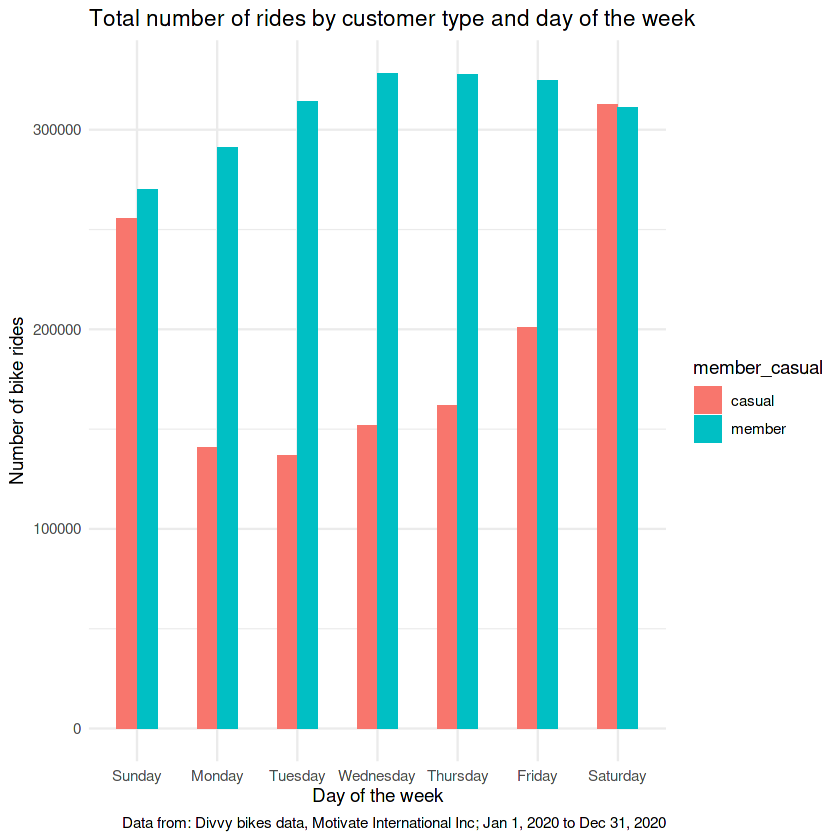

In [65]:
rides_day %>% 
ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title="Total number of rides by customer type and day of the week",
       caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31, 2020"),
       x="Day of the week",
       y="Number of bike rides") +theme_minimal()

#### Key findings: 

* Riders with membership ride more overall in comparison to casual riders all days of the week except for Saturday where there is a slight increase with casual riders.
* On average, casual riders ride more often on the weekends than weekdays
* A linear increase pattern in average no. of riders can be seen throughout the week starting from Sunday to Wednesday, and plateauing towards the end of the week (Thurs- Sat) for member riders

### Average duration of bike ride by customer type and day of the week

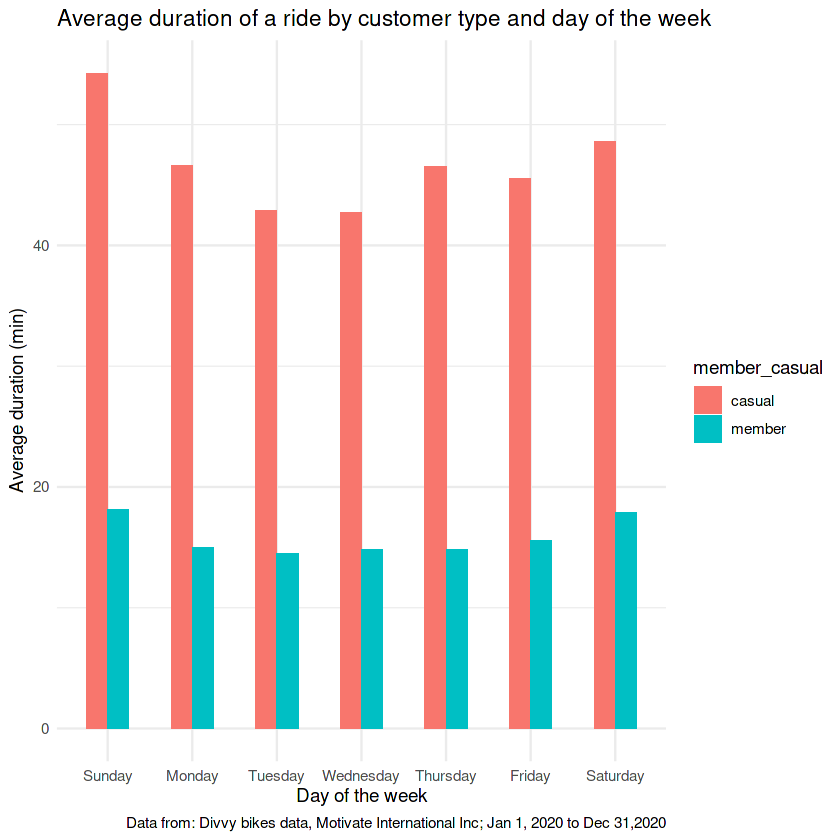

In [66]:
rides_day %>% 
ggplot(aes(x = day_of_week, y = average_duration, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title="Average duration of a ride by customer type and day of the week",
       caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31,2020"),
       x="Day of the week",
       y="Average duration (min)") +theme_minimal()

#### Key findings: 

* Average duration of the ride is consistently higher among casual riders in comparison with member riders throughout the week. 
* On average, casual riders ride more the longest on Sundays (54.3 min) and shortest on Tuesdays and Wednesdays (43 min)
* Members riders also ride the longest on sundays (18.2 min) than the rest of the week.

### No: of rides by customer type and month

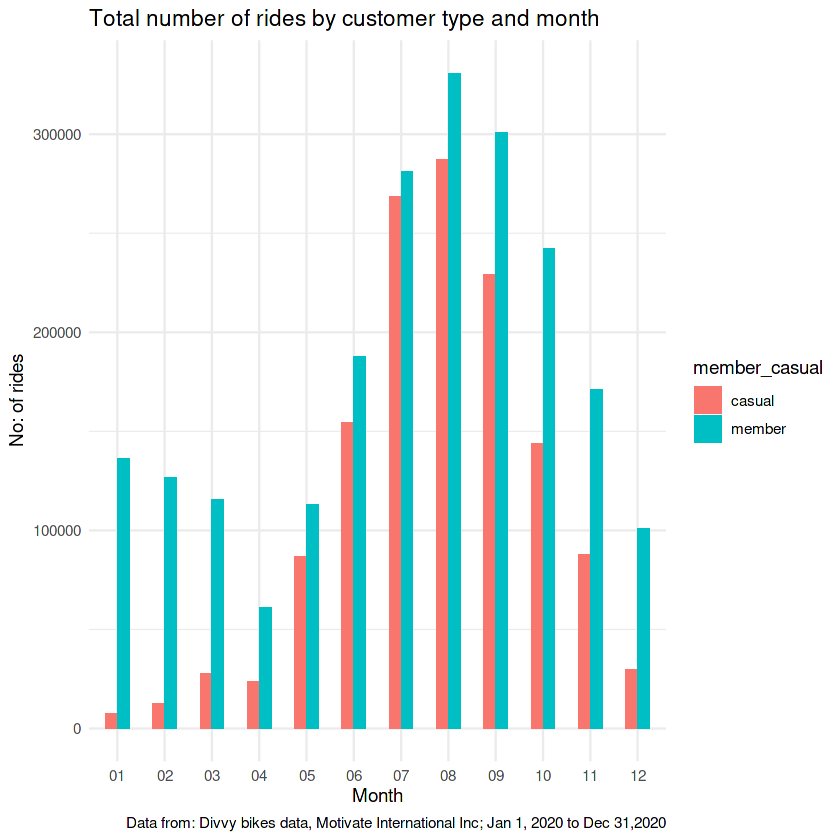

In [67]:
rides_month  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title="Total number of rides by customer type and month",
       caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31,2020"),
       x="Month",
       y="No: of rides") +theme_minimal()

#### Key findings: 

* The average no. of rides is higher among members compared with casual riders throughout the year.
* The average no. of rides among casual riders is higher between July - August, during summer months in comparison with the rest of the year
* The visualization shows that the average no: of rides among members show a downward trand (Jan - April) and then increases during spring and summer months and then shows a downward trend in the fall and winter months again.

### Average duration of bike ride by customer type and month

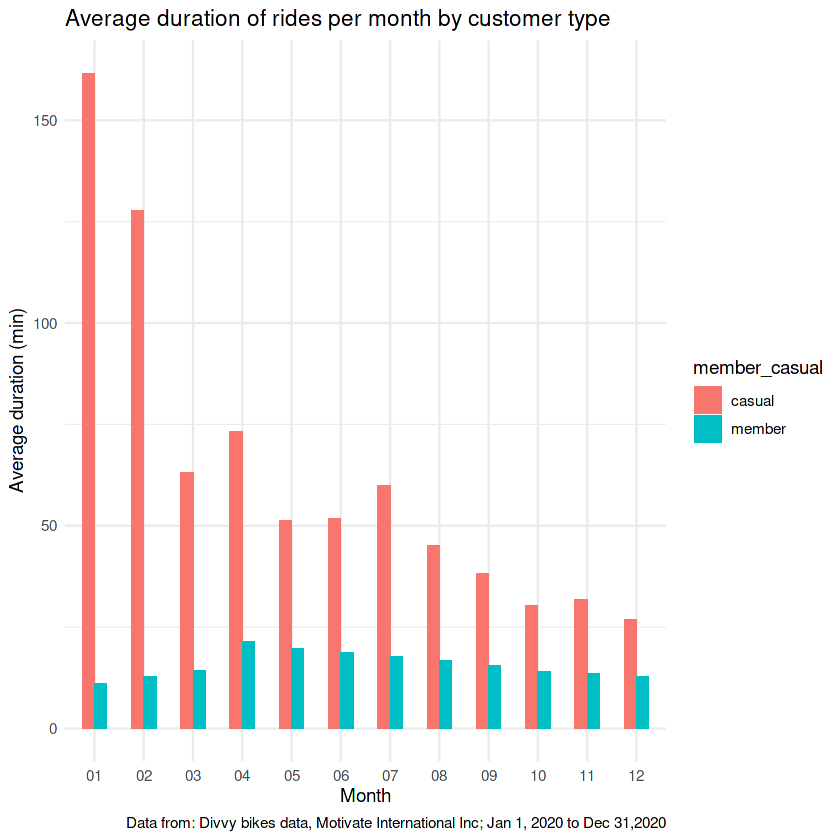

In [68]:
rides_month  %>% 
  ggplot(aes(x = month, y = average_duration, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title="Average duration of rides per month by customer type",
       caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31,2020"),
       x="Month",
       y="Average duration (min)") +theme_minimal()

#### Key findings: 

* Casual riders ride longer overall in comparison with members throughout the whole year.
* Casual riders on average ride longest in January and least in December. Members have a more consistent ride time duration throughout the year. 

### Demand for bikes in a 24h period 

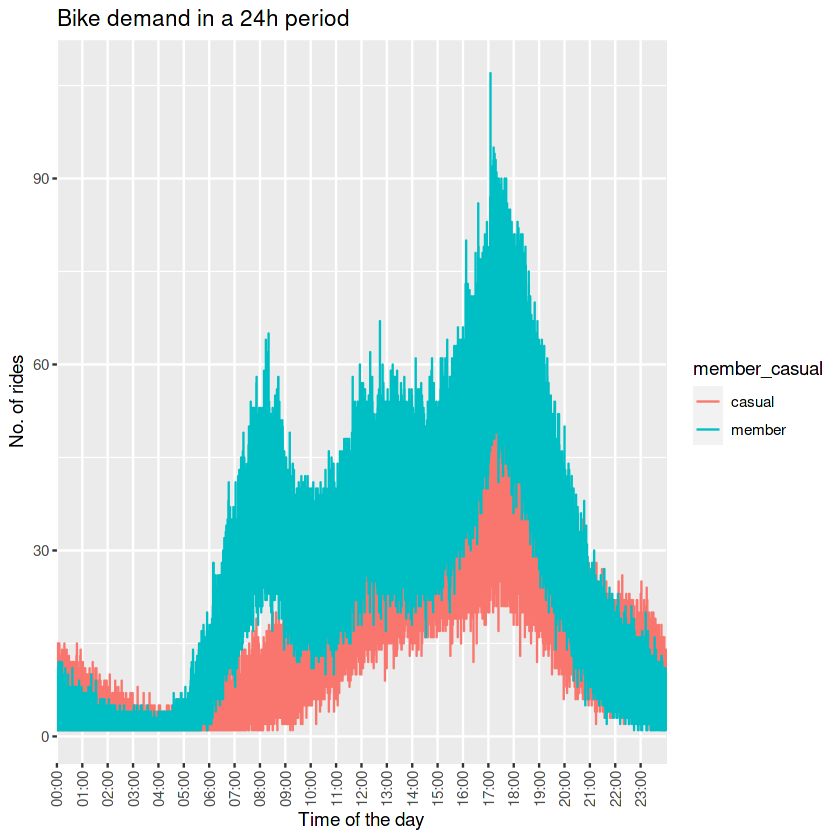

In [69]:
demand %>%
ggplot(aes(x = start_time, y = number_of_rides, color = member_casual, group = member_casual))+
  geom_line() +
  scale_x_datetime(date_breaks = "1 hour", minor_breaks = NULL,
                   date_labels = "%H:%M", expand = c(0,0)) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title ="Bike demand in a 24h period", x = "Time of the day", y = "No. of rides")

#### Key findings: 

* Bikes are more in demand among members than casual riders between 6 am and 9 pm.
* Among members, the bikes are in higher demand around 7 - 8 am and then between 5 - 6 pm which may reflect work commute hours. 
* Among casual riders, the peak demand hours are between 5 pm - 7pm reflecting leisure rides or commute rides.

### No. of rides vs. type of bike by customer type

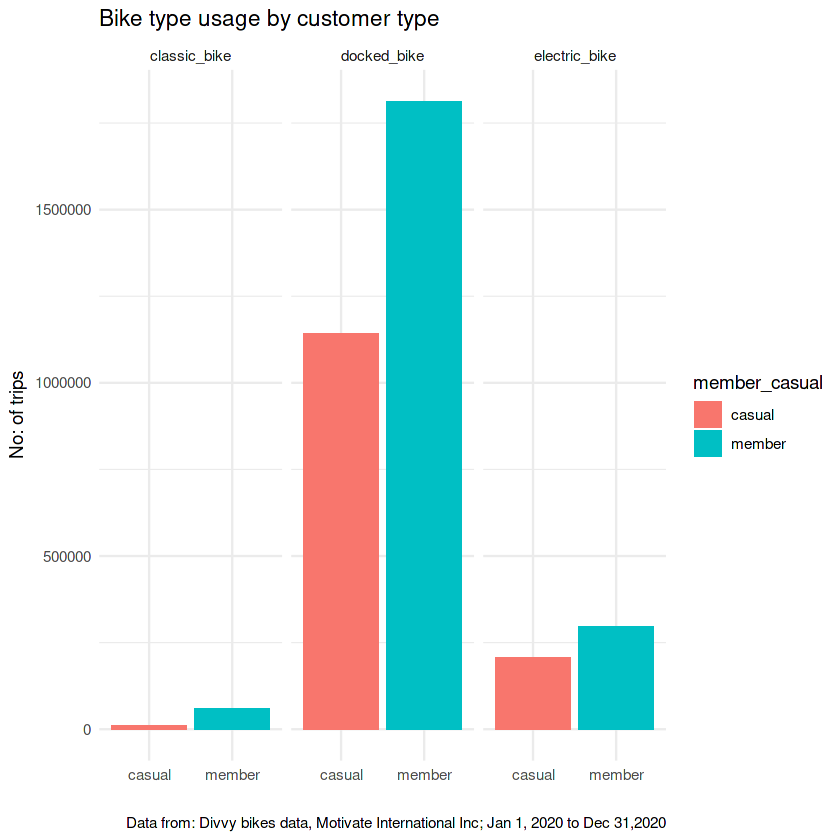

In [70]:
  biketype %>% 
  ggplot(aes(x = member_casual, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  facet_wrap(~rideable_type) +
  labs(title="Bike type usage by customer type",
       caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31,2020"),
       x="",
       y="No: of trips") +theme_minimal()

#### Key findings: 

* There is a higher use of docked bikes among casual and member riders over classic or electric bikes. 
* Members use docked bikes more often than casual riders.

### Comparing number of docked bike rides between members and casual riders for each day of week

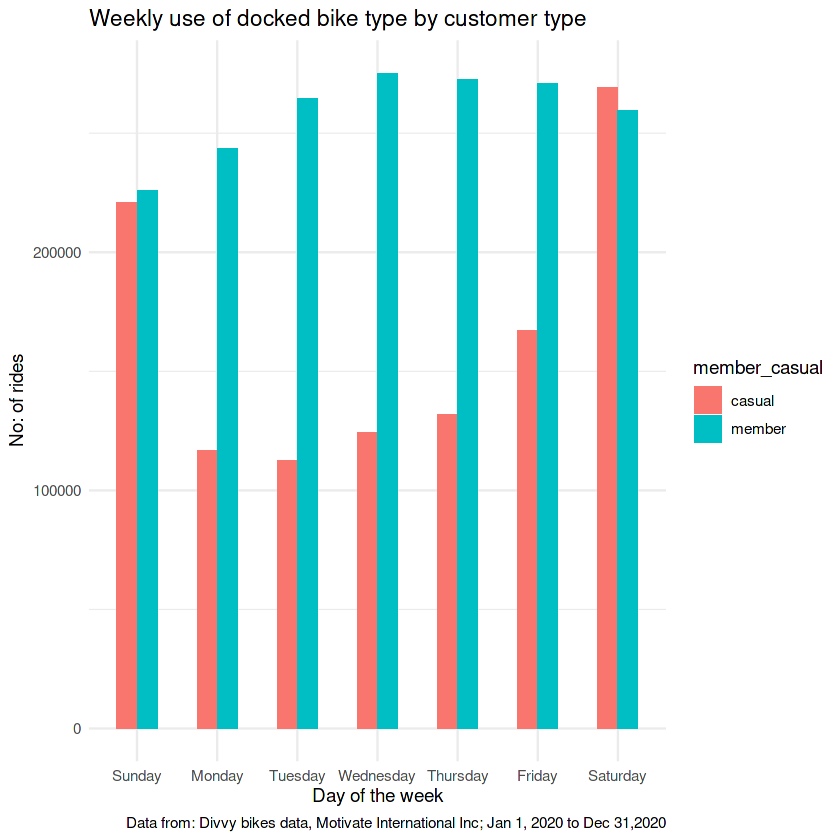

In [71]:
docked_bikes_day %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title="Weekly use of docked bike type by customer type",
       caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31,2020"),
       x="Day of the week",
       y="No: of rides") +theme_minimal()

#### Key findings: 

* The use of docked bikes is generally higher among members in comparison with casual riders all days of the week except for Saturday. 
* Casual riders use docked bikes more often on the weekends than weekdays.

### Comparing number of docked bike rides between members and casual riders by month

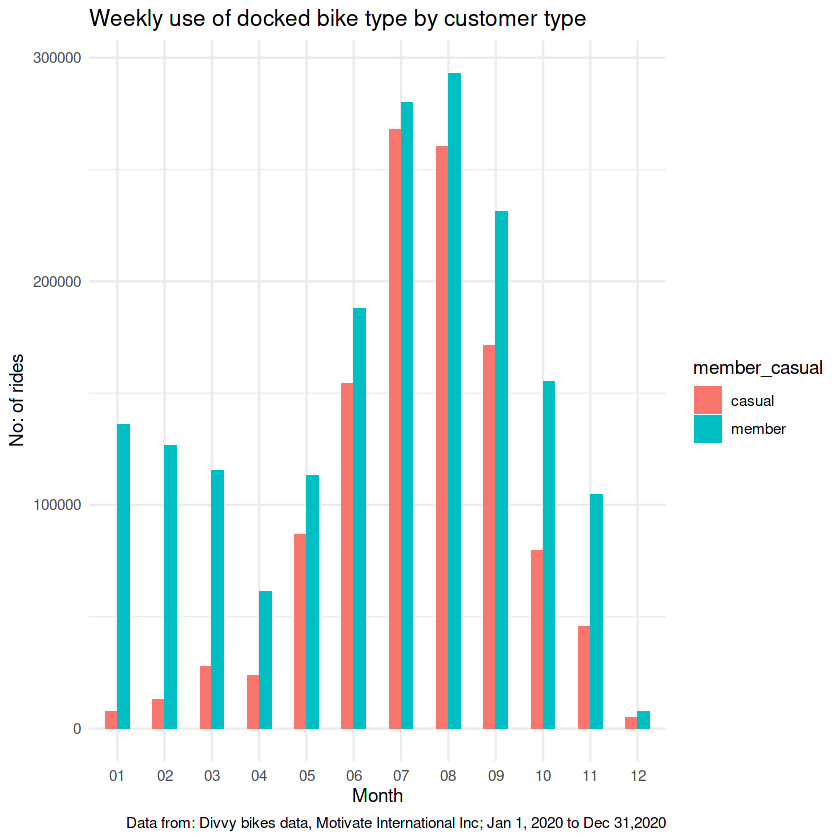

In [72]:
docked_bikes_month %>%
ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title="Weekly use of docked bike type by customer type",
       caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31,2020"),
       x="Month",
       y="No: of rides") +theme_minimal()

#### Key findings: 

* Members generally use docked bikes than casual riders throughout the year. 
* Causal members use docked bikes more often in July and August, reflecting seasonal patterns.

### No. of rides beyond a 24 h period by customer type and day of the week

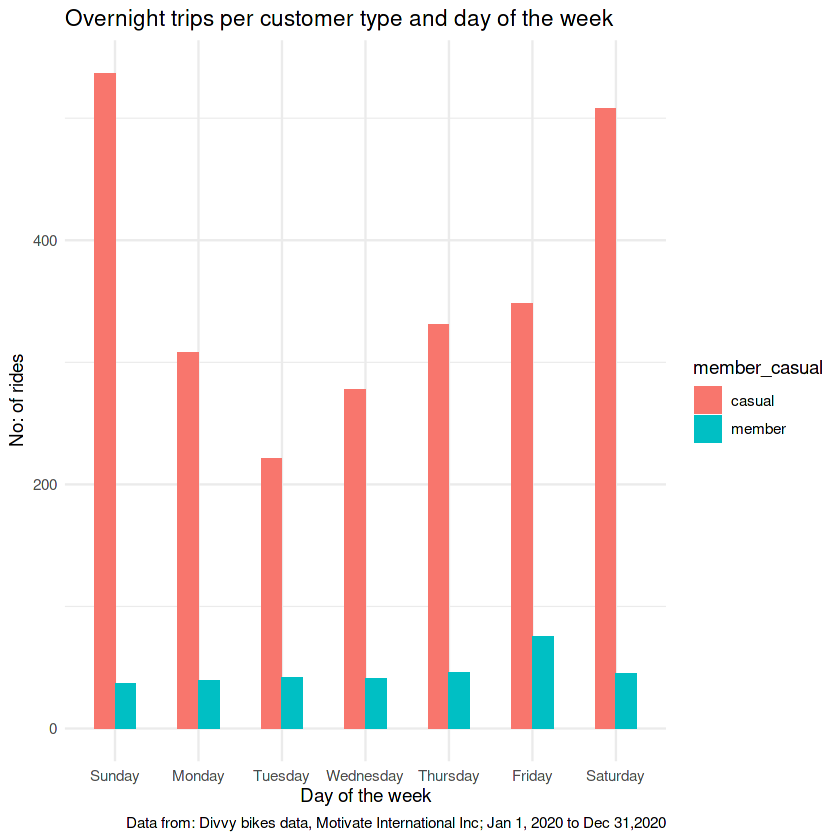

In [73]:
overnight_rides_day %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title="Overnight trips per customer type and day of the week",
       caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31,2020"),
       x="Day of the week",
       y="No: of rides") +theme_minimal()

#### Key findings: 

* Casual riders had more multi-day trips starting all days of the week in comparison to the members.
* Casual riders also made these over 24h trips more often on weekends than weekdays.

### No. of rides beyond a 24 h period by customer type and month

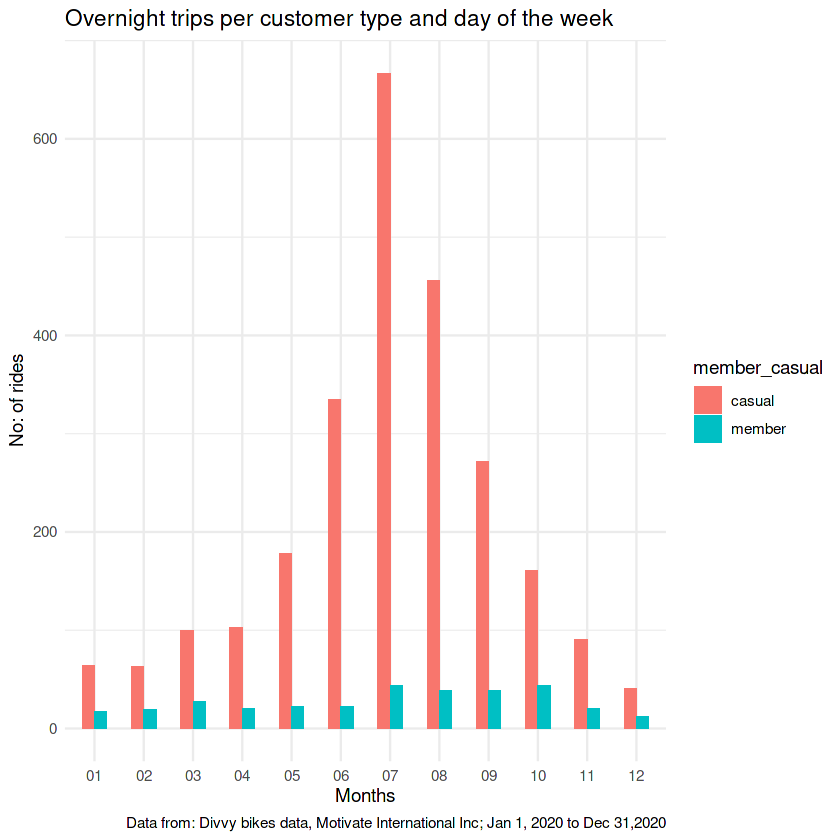

In [74]:
  overnight_rides_month %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title="Overnight trips per customer type and day of the week",
       caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31,2020"),
       x="Months",
       y="No: of rides") +theme_minimal()

#### Key findings: 

* Casual riders had more trips that were over 24h period throughout the year in comparison with members.
* Casual riders also made these over 24h trips most in July.

### Top 10 Stations used by casual riders

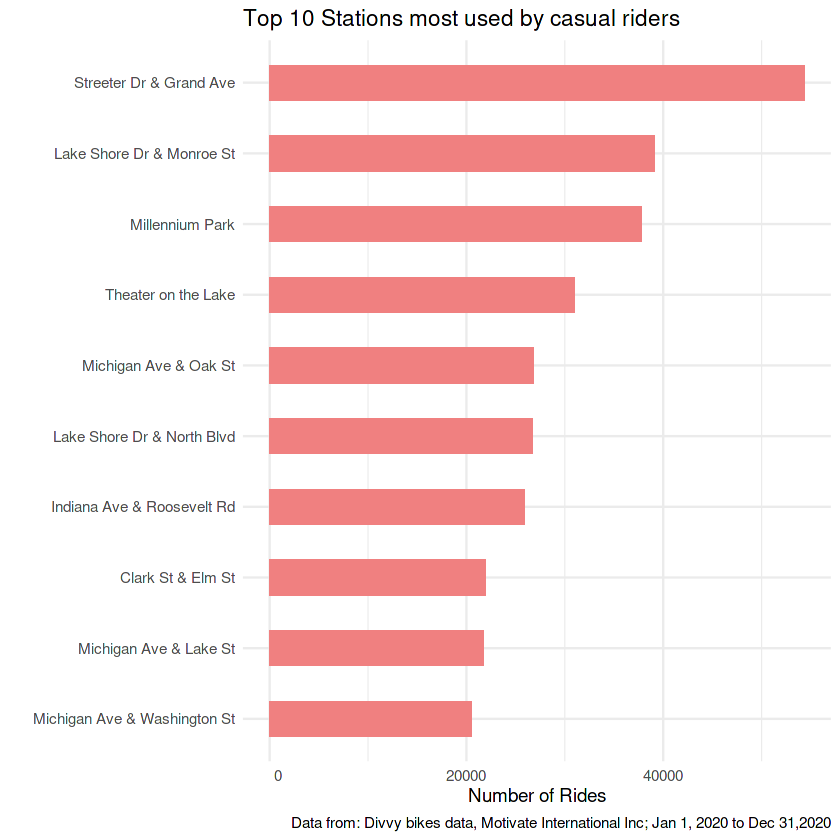

In [76]:
  station_top_10_casual %>%
  ggplot(aes(x = reorder(stations, station_count), y = station_count)) +
  geom_col(width=0.5, position = position_dodge(width=0.5), fill = 'lightcoral') +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title = 'Top 10 Stations most used by casual riders', caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31,2020"),
       x = '', y = "Number of Rides") +
  coord_flip() +theme_minimal()

#### Key findings: 

* This visualization shows the top 10 stations most used my casual riders in 2020, with the top station being Streeter Dr & Grand Ave station.

### Top 10 start stations used by casual riders 

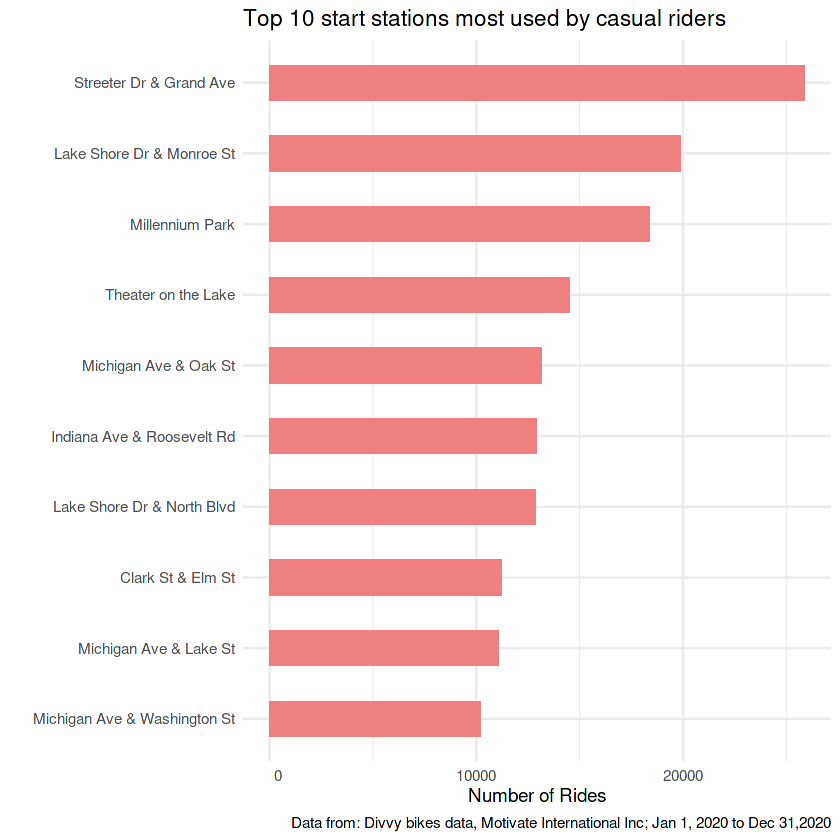

In [77]:
  start_station_top_10_casual %>%
  ggplot(aes(x = reorder(start_station_name, station_count), y = station_count)) +
  geom_col(width=0.5, position = position_dodge(width=0.5), fill = 'lightcoral') +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))+
  labs(title = 'Top 10 start stations most used by casual riders', caption=paste0("Data from: Divvy bikes data, Motivate International Inc; ", "Jan 1, 2020", " to ", "Dec 31,2020"),
       x = '', y = "Number of Rides") +
  coord_flip() +theme_minimal()

#### Key findings: 

* This visualization shows the top 10 start stations most used my casual riders in 2020, with the top station being Streeter Dr & Grand Ave station.

# Act

## Summary of key findings:

* On average, members ride more often during the week comapared with the casual riders, except for Saturdays. However, average duration of the ride is generally higher among casual riders in comparison to members all days of the week.
* On average, casual riders ride more often and longer duration on the weekends than weekdays.
* The average no. of rides is higher among the summer months (July - Aug) among casual riders in compared with the rest of the year.
* The peak demand for bikes among casual riders are between 5 - 7 pm and between 7 - 8 am and 5 - 6 pm for members. 
* Both casual and member riders use docked bikes more often than other bike types.
* Casual riders use docked bikes more often on the weekends and during summer months (July -Aug).
* Casual riders also use bikes for overnight trips than member riders.
* Streeter Dr & Grand Ave station has the most casual riders.


## Recommendations:

1. Advertise membership promotions on weekends to casual riders as they use the bike-share program more often and longer on the weekends than weekdays. 
2. Summer promotions for memberships may be advertised to casual members during July - Aug.
3. Target the stations with the most casual riders with discounted membership offers. 
4. Have physical copies of posters or ads available with membership promotion details at the docking stations. Target to play any digital ads during the peak bike demand hours.
5. Casual members seem to go on multi-day trips. Maybe partnering with a camping store to offer disocounted memberships to those users.


Other notes & recommendations:
* If the casual users are registered on the bike-share system with data on how long they have been using the program, loyalty discounts on memberships could be offered as well. 

****End****
